Исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

Задание:

1) Загрузить данные и убедимся, что всё считается правильно: посмотрим на столбцы, размер, наличие пропущенных значений (если есть – удалим). Также изучим типы переменных;

2) Построить график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

3) Выяснить на каких платформах произошло больше всего релизов?

4) Выяснить игры каких издателей (Publisher) встречаются в датасете чаще всего?

5) Выяснить в каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other) 

6) Изучить объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

7) Визуализировать динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. Выяснить в какие моменты времени было продано больше всего игр жанра Sports?

Описание данных:

**Rank** – место по объему продаж.

**Name** – название игры.

**Platform** – платформа, на которой выпущена игра.

**Year** – год релиза.

**Genre** – жанр.

**Publisher** – издатель.

**NA_Sales** – продажи в Северной Америке, в млн.

**EU_Sales** – продажи в Европе, в млн.

**JP_Sales** – продажи в Японии, в млн.

**Other_Sales** – продажи в остальном мире, в млн.

**Global_Sales** – продажи по всему миру, в млн.

In [1]:
import pandas as pd
import scipy
from scipy import stats
from scipy import linalg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps

In [15]:
#Первый шаг – загрузить данные и убедиться, что всё считалось правильно: 
#посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

#В каком столбце встретилось больше всего пропущенных значений?

df = pd.read_csv("/Users/siarheimasliankou/Documents/Data/Data_Analysis/Statistics/Task_1/games.csv")
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [34]:
#Удаляем строки с пропущенными значениями
df_cleaned = df.dropna(subset=['Year', 'Publisher'])

#Приводим столбец Year к нужному формату
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Year'], format='%Y')
df_cleaned['Year'] = df_cleaned['Year'].dt.year

/var/folders/m8/68839tv13t51_96pglc60m600000gn/T/ipykernel_41474/1208701026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_datetime(df_cleaned['Year'], format='%Y')
/var/folders/m8/68839tv13t51_96pglc60m600000gn/T/ipykernel_41474/1208701026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].dt.year


In [253]:
#Выведем описательные характеристики переменной Year и 
#построим график распределения количества выпущенных игр по годам.

df_cleaned.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

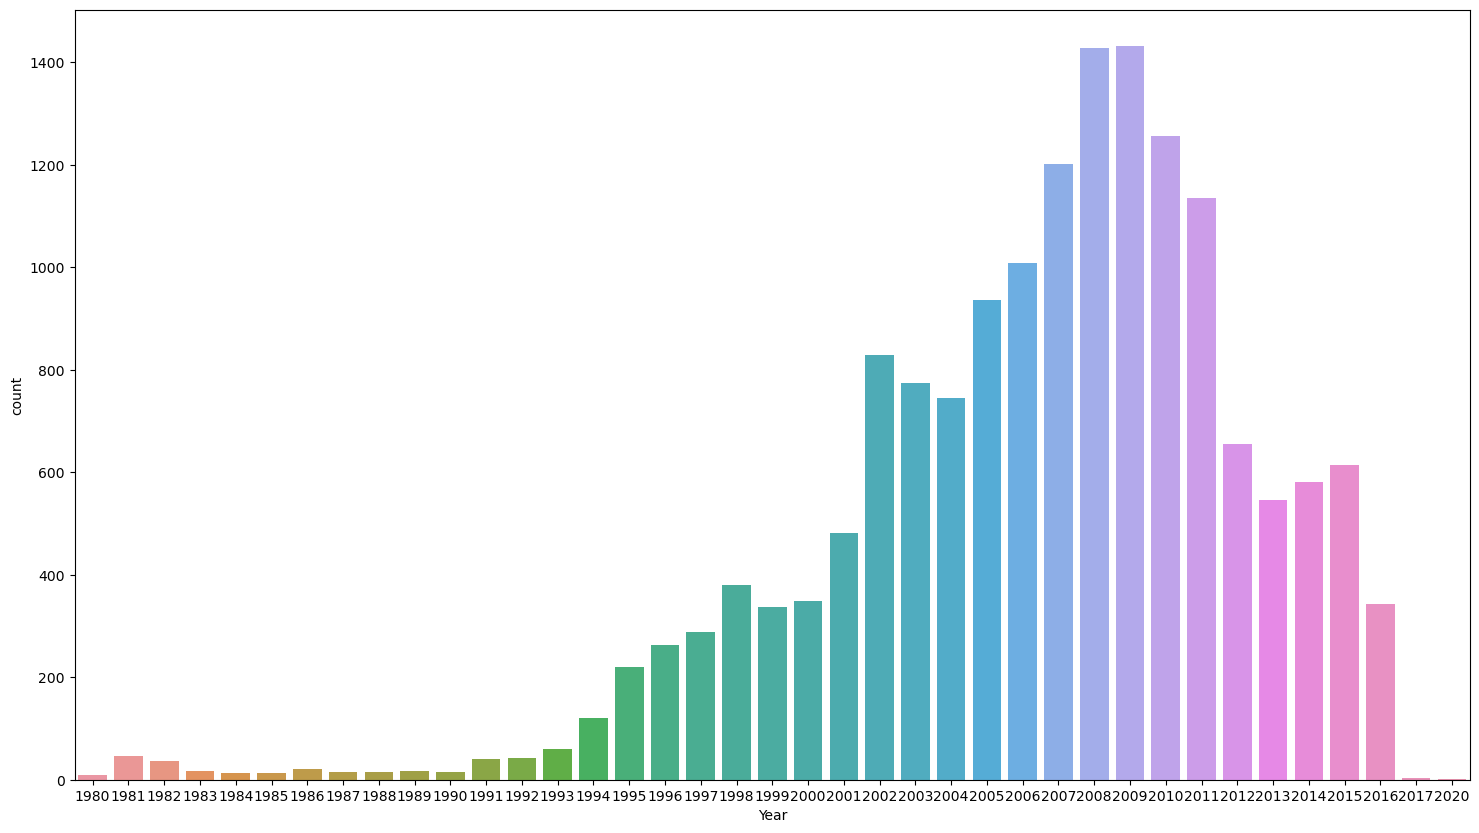

In [254]:
plt.figure(figsize=(18, 10))
e = sns.countplot(x = 'Year', data=df_cleaned)

In [255]:
#На каких платформах произошло больше всего релизов? 
#Оставляем названия только тех платформ, частота встречаемости которых составляет более 7%. 
#Значения указываем в порядке убывания частоты встречаемостию.

platform_frequency = df_cleaned.Platform.value_counts(normalize=True) * 100
f = platform_frequency[platform_frequency > 7]
f

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
Name: proportion, dtype: float64

In [256]:
#Игры каких издателей (Publisher) встречаются в датасете чаще всего?
#В качестве ответа указываем наибольшую абсолютную частоту встречаемости.

df_cleaned.Publisher.value_counts() 

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

In [257]:
#Сфокусируемся на играх от Nintendo. 
#Посчитаем медиану по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
desc = df_cleaned.query("Publisher == 'Nintendo'")
desc.NA_Sales.median()

0.375

In [258]:
desc.EU_Sales.median()

0.12

In [259]:
desc.JP_Sales.median()

0.28

In [260]:
desc.Other_Sales.median()

0.03

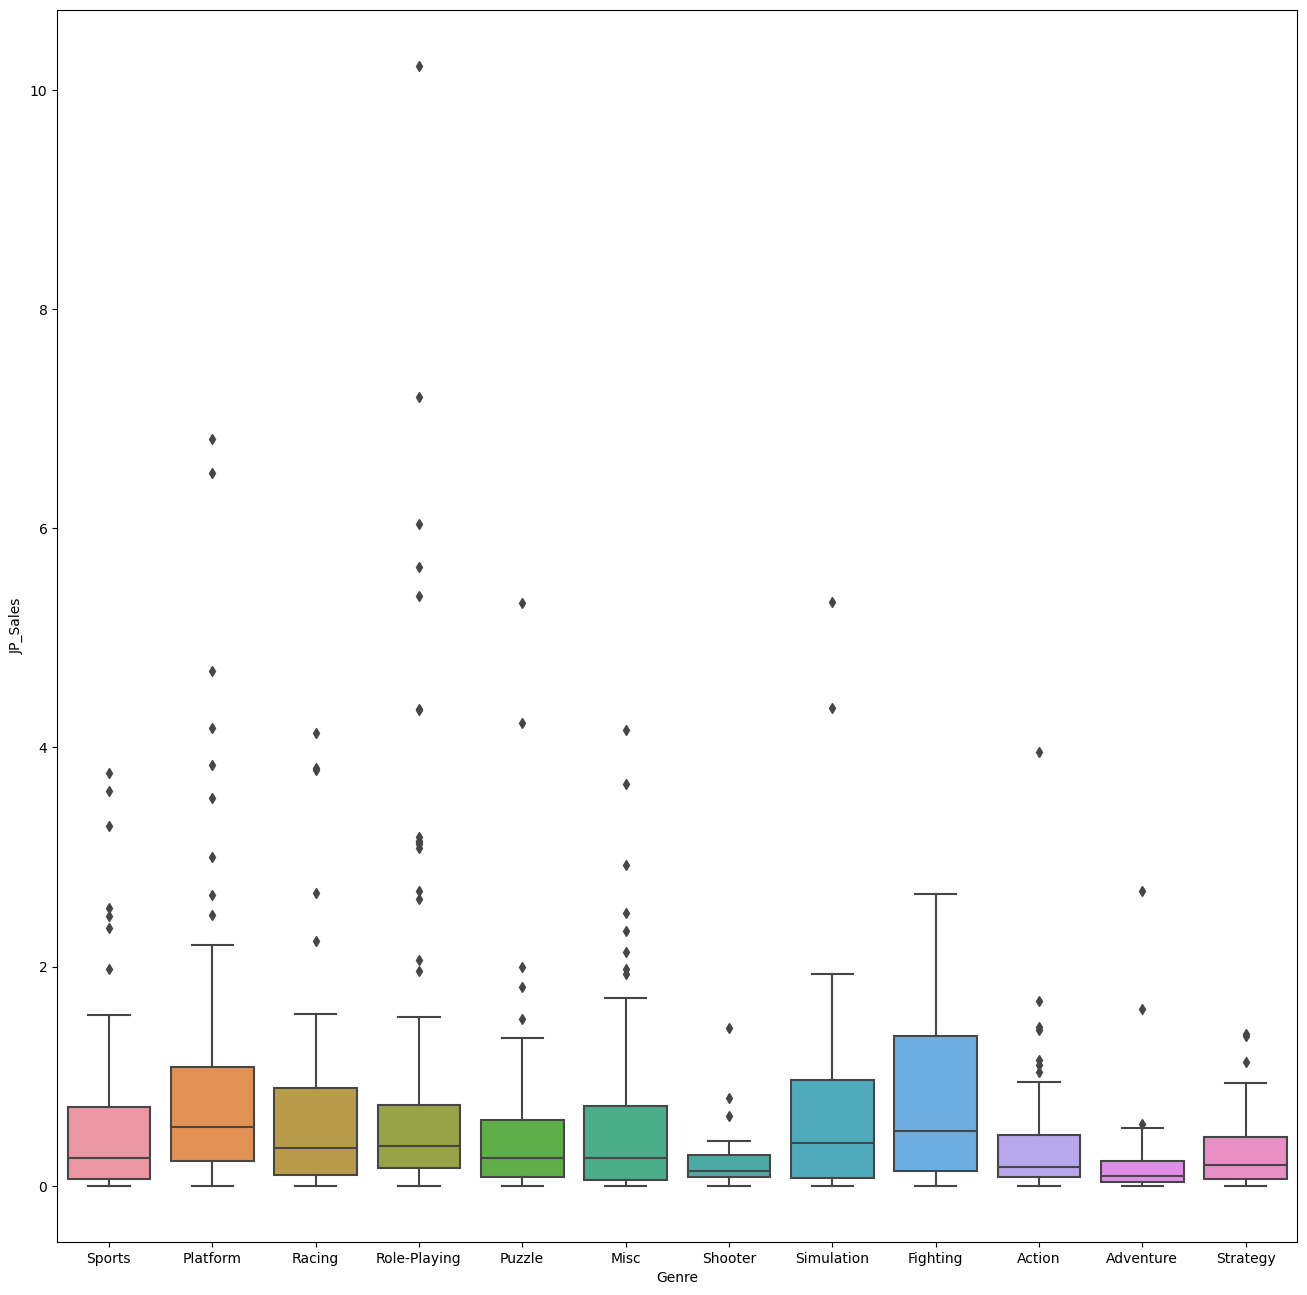

In [261]:
#Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

#по оси x будет расположен жанр игры (Genre)
#по оси у – объем продаж в Японии (JP_sales)
#Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

plt.figure(figsize=(16, 16))
r = sns.boxplot(x='Genre', y='JP_Sales', data=desc)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


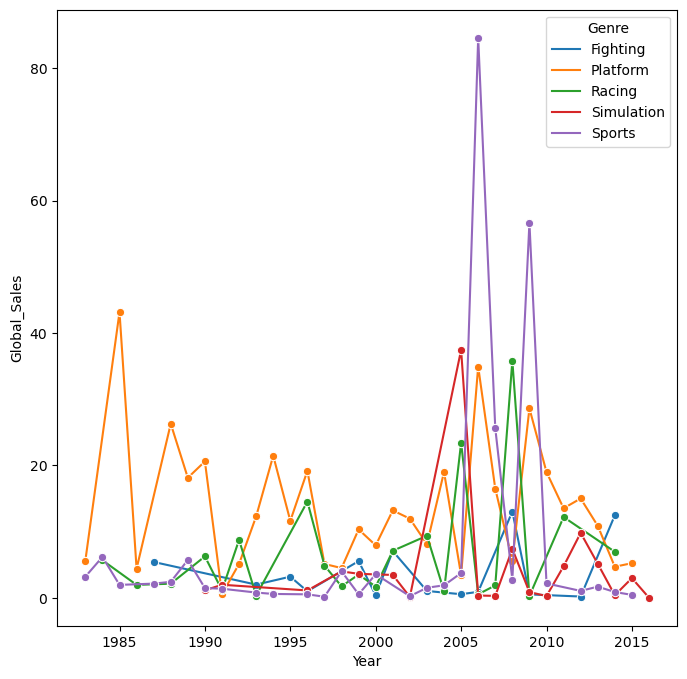

In [262]:
#Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: 
#Fighting, Simulation, Platform, Racing, Sports.

#На каком отрезке времени игры жанра Sports были наиболее популярны? 
#Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.

#Наиболее популярны игры жанра Sports были в период 2005-2010 гг.

total = desc.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
            .groupby(['Genre','Year'], as_index = False)\
            .agg({'Global_Sales': 'sum'})

plt.figure(figsize=(8, 8))
r = sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = total, marker='o')
plt.show()